# EdgeTTS

https://github.com/rany2/edge-tts

edge-tts is a Python module that allows you to use Microsoft Edge's online text-to-speech service from within your Python code or using the provided edge-tts or edge-playback command.

In [1]:
!pip3 install edge-tts
!pip3 install pygame

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 629.9 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.7/387.7 kB 946.1 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 917.4 kB/s eta 0:00:00B/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 950.3 kB/s eta 0:00:00B/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 925.8 kB/s eta 0:00:00 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 957.3 kB/s eta 0:00:001m1.1 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 949.4 kB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
import asyncio
import edge_tts
import pygame
import datetime

TEXT = """
The Truth About Learning: Symbol Systems
1. All knowledge is essentially a series of symbol systems.
2. The illusion of difficulty traps.
3. What, how, why—only how is what you need to learn, and learning how requires rote memorization.
4. Rote memorization is the hard work of learning.
5. Repetition in abundance solidifies neural connections.
6. Sufficient repetition in a short period.
7. If I don't learn this thing, I'll be at a disadvantage.
8. The so-called "effort" is nothing more than finding ways to achieve "sufficient repetition in a short period"... and if either "short" or "sufficient" is not done, then it's "not enough effort"
9. Clear definitions with no ambiguity.
"""

VOICE = "en-US-GuyNeural" # Male
# VOICE = "en-US-AnaNeural" # Female
# VOICE = "en-US-AndrewNeural" # Male
# VOICE = "en-US-AriaNeural" # Female
# VOICE = "en-US-AvaNeural" # Female
# VOICE = "en-US-BrianNeural" # Male
# VOICE = "en-US-ChristopherNeural" # Male
# VOICE = "en-US-EmmaNeural" # Female
# VOICE = "en-US-EricNeural" # Male
# VOICE = "en-US-GuyNeural" # Male
# VOICE = "en-US-JennyNeural" # Female
# VOICE = "en-US-MichelleNeural" # Female
# VOICE = "en-US-RogerNeural" # Male
# VOICE = "en-US-SteffanNeural" # Male
# VOICE = "en-GB-LibbyNeural" # Female
# VOICE = "en-GB-MaisieNeural" # Female
# VOICE = "en-GB-RyanNeural" # Male
# VOICE = "en-GB-SoniaNeural" # Female
# VOICE = "en-GB-ThomasNeural" # Male
# VOICE = "en-AU-NatashaNeural" # Female
# VOICE = "en-AU-WilliamNeural" # Male
# VOICE = "en-CA-ClaraNeural" # Female
# VOICE = "en-CA-LiamNeural" # Male

OUTPUT_FILE_NAME = f"{datetime.datetime.now().strftime('%Y.%m.%d')}"

OUTPUT_FILE = f"{OUTPUT_FILE_NAME}.mp3"
WEBVTT_FILE = f"{OUTPUT_FILE_NAME}.vtt"

communicate = edge_tts.Communicate(TEXT, VOICE)
await communicate.save(OUTPUT_FILE)

submaker = edge_tts.SubMaker()
with open(OUTPUT_FILE, "wb") as file:
    async for chunk in communicate.stream():
        if chunk["type"] == "audio":
            file.write(chunk["data"])
        elif chunk["type"] == "WordBoundary":
            submaker.create_sub((chunk["offset"], chunk["duration"]), chunk["text"])

with open(WEBVTT_FILE, "w", encoding="utf-8") as file:
    file.write(submaker.generate_subs())

print("Files created!") 

Files created!


In [4]:
pygame.mixer.init()
pygame.mixer.music.load(OUTPUT_FILE)
pygame.mixer.music.play()

In [3]:
!pip3 install amfm_decompy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.5/751.5 kB 800.0 kB/s eta 0:00:001m789.2 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 826.9 kB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 961.1 kB/s eta 0:00:001.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 950.8 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 948.2 kB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for amfm_decompy: filename=AMFM_decompy-1.0.11-py3-none-any.whl size=42835 sha256=eeb270282419a2808fbba5cec719672b90b9ae9bc81b3779030338f9cf881bb1
  Stored in directory: /Users/johnnywu/Library/Caches/pip/wheels/6c/6c/e3/4882dccd4581598c6d1c0bef58cf6f079ff0477350a11dc710
Successfully built amfm_decompy

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


/usr/local/lib/python3.11/site-packages/amfm_decompy/pYAAPT.py:970: RuntimeWarning: invalid value encountered in divide
  phi[lag_min:lag_max] = formula_nume/np.sqrt(formula_denom)


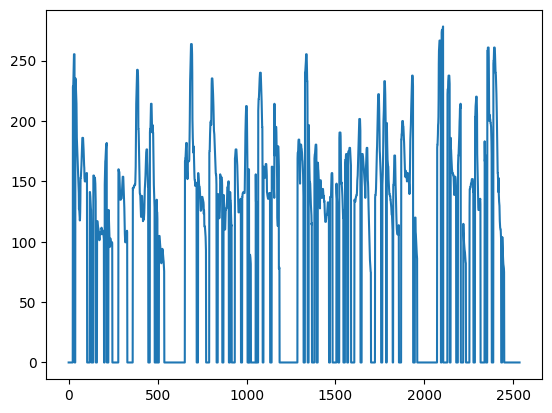

In [8]:
import amfm_decompy.basic_tools as basic
import amfm_decompy.pYAAPT as pYAAPT
import matplotlib.pyplot as plt
import numpy as np

#load audio 注意必须是wav
signal = basic.SignalObj("/Users/johnnywu/Desktop/1.wav")

#pYAAPT pitches 生成pitches文件
pitch = pYAAPT.yaapt(signal, frame_length = 40, tda_frame_length=40,f0_min=75, f0_max=600)

#plot 
plt.plot(pitch.samp_values)
plt.show()